## Setting up the model

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
df=pd.read_csv(r'C:\Users\Tirthankar\Documents\Projects\Datasheets\ucl.csv')
print('data imported!')

data imported!


In [4]:
print(df.head(5))
print('the dimension of the dataset are {}'.format(df.shape))

    Rk              Squad   MP    W    D    L    GF   GA    GD   Pts    xG  \
0  R16  de  Bayern Munich  6.0  6.0  0.0  0.0  22.0  3.0  19.0  18.0  13.9   
1  R16           nl  Ajax  6.0  6.0  0.0  0.0  20.0  5.0  15.0  18.0  16.3   
2  R16     eng  Liverpool  6.0  6.0  0.0  0.0  17.0  6.0  11.0  18.0  11.6   
3  R16    es  Real Madrid  6.0  5.0  0.0  1.0  14.0  3.0  11.0  15.0  11.7   
4  R16       it  Juventus  6.0  5.0  0.0  1.0  10.0  6.0   4.0  15.0  10.9   

   xGA   xGD  xGD/90     Last 5  Attendance         Top Team Scorer  \
0  3.4  10.5    1.75  W W W W W     25000.0  Robert Lewandowski - 9   
1  6.4   9.9    1.65  W W W W L     35552.0   Sébastien Haller - 10   
2  5.8   5.8    0.97  W W W W W     51667.0       Mohamed Salah - 7   
3  5.9   5.9    0.98  W W W W W     35838.0       Karim Benzema - 5   
4  6.1   4.8    0.79  W W W D W     19163.0        Paulo Dybala - 3   

          Goalkeeper  Notes  
0       Manuel Neuer    NaN  
1      Remko Pasveer    NaN  
2            A

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rk               32 non-null     object 
 1   Squad            32 non-null     object 
 2   MP               32 non-null     float64
 3   W                32 non-null     float64
 4   D                32 non-null     float64
 5   L                32 non-null     float64
 6   GF               32 non-null     float64
 7   GA               32 non-null     float64
 8   GD               32 non-null     float64
 9   Pts              32 non-null     float64
 10  xG               32 non-null     float64
 11  xGA              32 non-null     float64
 12  xGD              32 non-null     float64
 13  xGD/90           32 non-null     float64
 14  Last 5           32 non-null     object 
 15  Attendance       32 non-null     float64
 16  Top Team Scorer  32 non-null     object 
 17  Goalkeeper       3

In [6]:
df.describe()

,MP,W,D,L,GF,GA,GD,Pts,xG,xGA,xGD,xGD/90,Attendance,Notes
count,32.0,32.00000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.00000,0.0
mean,6.0,2.43750,1.125000,2.437500,9.281250,9.281250,0.000000,8.437500,8.837500,8.837500,-0.006250,0.000625,31099.87500,NaN
std,0.0,1.79493,0.906962,1.479701,5.490369,4.136653,8.151786,4.924838,3.425215,3.462681,6.185672,1.029287,14580.84057,NaN
min,6.0,0.00000,0.000000,0.000000,1.000000,3.000000,-16.000000,0.000000,2.000000,3.400000,-12.900000,-2.150000,5689.00000,NaN
25%,6.0,1.00000,0.000000,1.000000,5.750000,6.000000,-5.000000,5.000000,6.800000,6.100000,-3.825000,-0.640000,20614.25000,NaN
50%,6.0,2.00000,1.000000,2.500000,8.000000,9.000000,0.000000,7.500000,8.450000,8.500000,-0.350000,-0.055000,30686.00000,NaN
75%,6.0,3.00000,2.000000,3.000000,13.000000,11.250000,3.250000,11.000000,11.300000,10.400000,3.675000,0.617500,40862.25000,NaN
max,6.0,6.00000,3.000000,6.000000,22.000000,20.000000,19.000000,18.000000,16.300000,18.300000,10.500000,1.750000,72855.00000,NaN


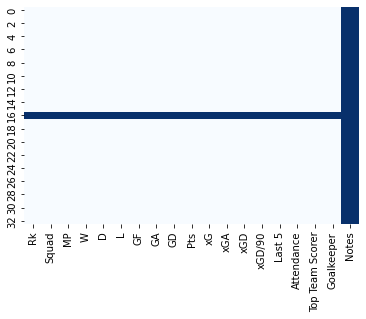

In [7]:
sns.heatmap(df.isnull(),cbar=False,cmap="Blues")
plt.show()

#### The data is messed up at some levels. We need to fix it first before getting any further.  The missing 
#### values are too insignificant to be imputed. We'll just drop them.  

In [8]:
df.dropna(axis=1, how='all',inplace=True)
df.dropna(axis=0, how='all',inplace=True)
print(df.head(5))

    Rk              Squad   MP    W    D    L    GF   GA    GD   Pts    xG  \
0  R16  de  Bayern Munich  6.0  6.0  0.0  0.0  22.0  3.0  19.0  18.0  13.9   
1  R16           nl  Ajax  6.0  6.0  0.0  0.0  20.0  5.0  15.0  18.0  16.3   
2  R16     eng  Liverpool  6.0  6.0  0.0  0.0  17.0  6.0  11.0  18.0  11.6   
3  R16    es  Real Madrid  6.0  5.0  0.0  1.0  14.0  3.0  11.0  15.0  11.7   
4  R16       it  Juventus  6.0  5.0  0.0  1.0  10.0  6.0   4.0  15.0  10.9   

   xGA   xGD  xGD/90     Last 5  Attendance         Top Team Scorer  \
0  3.4  10.5    1.75  W W W W W     25000.0  Robert Lewandowski - 9   
1  6.4   9.9    1.65  W W W W L     35552.0   Sébastien Haller - 10   
2  5.8   5.8    0.97  W W W W W     51667.0       Mohamed Salah - 7   
3  5.9   5.9    0.98  W W W W W     35838.0       Karim Benzema - 5   
4  6.1   4.8    0.79  W W W D W     19163.0        Paulo Dybala - 3   

          Goalkeeper  
0       Manuel Neuer  
1      Remko Pasveer  
2            Alisson  
3   Thibaut 

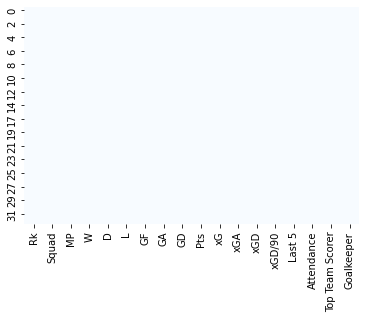

In [9]:
sns.heatmap(df.isnull(),cbar=False,cmap="Blues")
plt.show()

#### we have succesfully deleted all the missing values 

In [10]:
# split column into multiple columns by delimiter 
df[['Top Scorer','Goals']]=df['Top Team Scorer'].str.split('-', expand=True)
df[['Country','Team']]=df['Squad'].str.split('  ', expand=True)
df.drop(['Top Team Scorer'],axis=1,inplace=True)
df.drop(['Squad'],axis=1,inplace=True)
print(df.head(5))

    Rk   MP    W    D    L    GF   GA    GD   Pts    xG  xGA   xGD  xGD/90  \
0  R16  6.0  6.0  0.0  0.0  22.0  3.0  19.0  18.0  13.9  3.4  10.5    1.75   
1  R16  6.0  6.0  0.0  0.0  20.0  5.0  15.0  18.0  16.3  6.4   9.9    1.65   
2  R16  6.0  6.0  0.0  0.0  17.0  6.0  11.0  18.0  11.6  5.8   5.8    0.97   
3  R16  6.0  5.0  0.0  1.0  14.0  3.0  11.0  15.0  11.7  5.9   5.9    0.98   
4  R16  6.0  5.0  0.0  1.0  10.0  6.0   4.0  15.0  10.9  6.1   4.8    0.79   

      Last 5  Attendance         Goalkeeper           Top Scorer Goals  \
0  W W W W W     25000.0       Manuel Neuer  Robert Lewandowski      9   
1  W W W W L     35552.0      Remko Pasveer    Sébastien Haller     10   
2  W W W W W     51667.0            Alisson       Mohamed Salah      7   
3  W W W W W     35838.0   Thibaut Courtois       Karim Benzema      5   
4  W W W D W     19163.0  Wojciech Szczęsny        Paulo Dybala      3   

  Country           Team  
0      de  Bayern Munich  
1      nl           Ajax  
2    

####   We have successfully cleaned the dataset 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 0 to 32
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rk          32 non-null     object 
 1   MP          32 non-null     float64
 2   W           32 non-null     float64
 3   D           32 non-null     float64
 4   L           32 non-null     float64
 5   GF          32 non-null     float64
 6   GA          32 non-null     float64
 7   GD          32 non-null     float64
 8   Pts         32 non-null     float64
 9   xG          32 non-null     float64
 10  xGA         32 non-null     float64
 11  xGD         32 non-null     float64
 12  xGD/90      32 non-null     float64
 13  Last 5      32 non-null     object 
 14  Attendance  32 non-null     float64
 15  Goalkeeper  32 non-null     object 
 16  Top Scorer  32 non-null     object 
 17  Goals       32 non-null     object 
 18  Country     32 non-null     object 
 19  Team        32 non-null     obj

##### The column goals is not a numeric datatype as it seems

In [12]:
convert_dict={'Goals':float}
df=df.astype(convert_dict)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 0 to 32
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rk          32 non-null     object 
 1   MP          32 non-null     float64
 2   W           32 non-null     float64
 3   D           32 non-null     float64
 4   L           32 non-null     float64
 5   GF          32 non-null     float64
 6   GA          32 non-null     float64
 7   GD          32 non-null     float64
 8   Pts         32 non-null     float64
 9   xG          32 non-null     float64
 10  xGA         32 non-null     float64
 11  xGD         32 non-null     float64
 12  xGD/90      32 non-null     float64
 13  Last 5      32 non-null     object 
 14  Attendance  32 non-null     float64
 15  Goalkeeper  32 non-null     object 
 16  Top Scorer  32 non-null     object 
 17  Goals       32 non-null     float64
 18  Country     32 non-null     object 
 19  Team        32 non-null     obj

##### now it is 

In [13]:
df.columns

Index(['Rk', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'xG', 'xGA', 'xGD',
       'xGD/90', 'Last 5', 'Attendance', 'Goalkeeper', 'Top Scorer', 'Goals',
       'Country', 'Team'],
      dtype='object')

### Data Viz
#### time to explore the data for better understanding

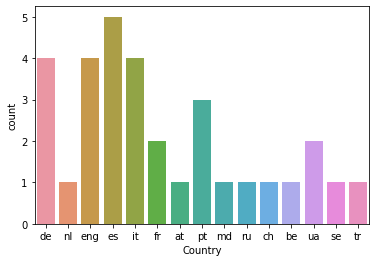

In [55]:
sns.countplot(x='Country',data=df)
plt.show()

###### Spain has most teams in the competition among top 5 leagues

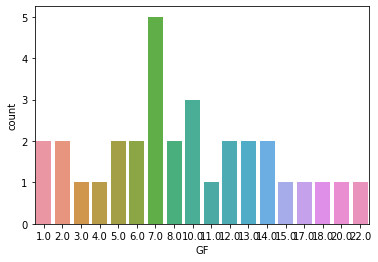

In [56]:
sns.countplot(x='GF',data=df)
plt.show()

#### most teams scored around 7 goals and conceeded around 9-11 goals

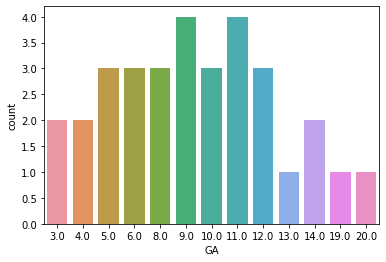

In [57]:
sns.countplot(x='GA',data=df)
plt.show()

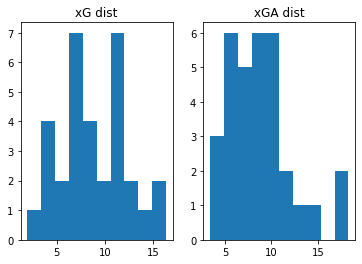

In [58]:
plt.subplot(1,2,1)
plt.hist(x='xG',data=df)
plt.title('xG dist')

plt.subplot(1,2,2)
plt.hist(x='xGA',data=df)
plt.title('xGA dist')

plt.show()

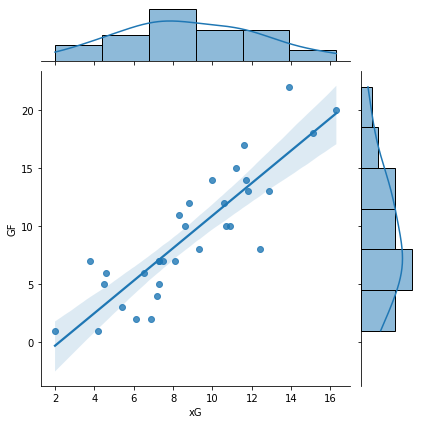

In [23]:
sns.jointplot(x='xG',y='GF',kind='reg',data=df)
plt.show()

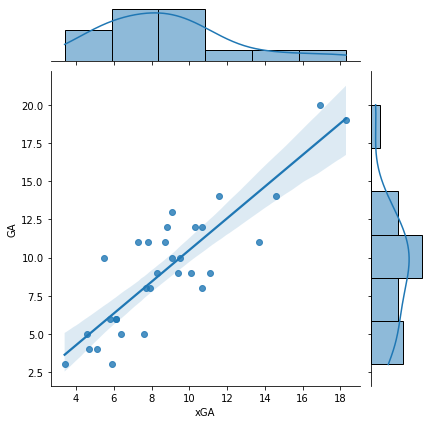

In [24]:
sns.jointplot(x='xGA',y='GA',kind='reg',data=df)
plt.show()

#### the linear relationship between xG, GF(=goals for) & xGA, GA(=goals against) is no surprise

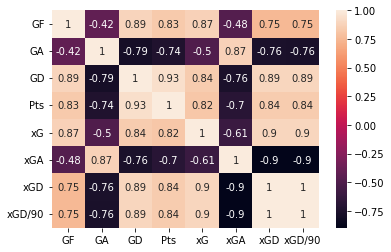

In [27]:
sns.heatmap(df[['GF', 'GA', 'GD', 'Pts', 'xG', 'xGA', 'xGD','xGD/90']].corr(),annot=True)
plt.show()

#### we intend to understand underlying relationships between points scored  and different statistical metrics such as xG, xA and so on

#### To avoid multi-colinearity we'll drop control variables having higher correlation coefficient among them from the dataset for the model  

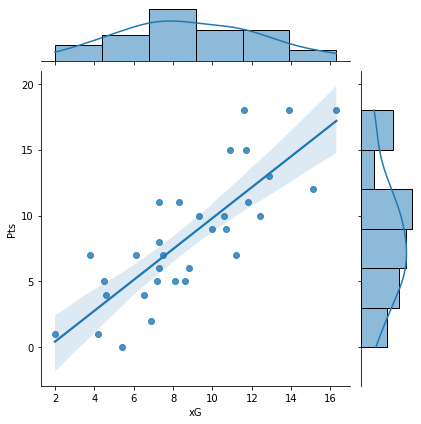

In [25]:
sns.jointplot(x='xG',y='Pts',kind='reg',data=df)
plt.show()

#### It is to be noted that's the points scored has linear relationship with xG 

## Training the model

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
train, test = train_test_split(df, test_size=0.3)
print('training & testing data created.')

training & testing data created.


In [17]:
print(train.columns)
print('\n')
print(test.columns)

Index(['Rk', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'xG', 'xGA', 'xGD',
       'xGD/90', 'Last 5', 'Attendance', 'Goalkeeper', 'Top Scorer', 'Goals',
       'Country', 'Team'],
      dtype='object')


Index(['Rk', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'xG', 'xGA', 'xGD',
       'xGD/90', 'Last 5', 'Attendance', 'Goalkeeper', 'Top Scorer', 'Goals',
       'Country', 'Team'],
      dtype='object')


In [18]:
X_train=train['xG']
y_train=train['Pts']

X_test=test['xG']
y_test=test['Pts']

In [19]:
X_train = X_train.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)

X_test = X_test.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lm=LinearRegression()

In [22]:
lm.fit(X_train,y_train)
print('training complete!')

training complete!


## Model Evaluation

Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [23]:
# print the intercept
print(lm.intercept_)

[-2.69564559]


In [24]:
# print the co-efficients
print(lm.coef_)

[[1.27707372]]


#### holding all other featuers fixed, a single unit increase in xG wil result in 1.2 units increase of points. In mathematical terms, points scored =  1.28*xG - 2.69 

In [45]:
predictions = lm.predict(X_test)
data={'y_test':[6,5,10,7,5,18,15,1,9,9],
     'predctions':[8.54260316,6.49928521,13.14006856,2.15723456,8.28718842,18.12065607,12.24611695,-0.14149814,10.96904323,10.07509163]}
df_pred=pd.DataFrame(data)
print(df_pred)

   y_test  predctions
0       6    8.542603
1       5    6.499285
2      10   13.140069
3       7    2.157235
4       5    8.287188
5      18   18.120656
6      15   12.246117
7       1   -0.141498
8       9   10.969043
9       9   10.075092


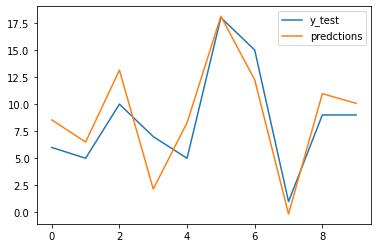

In [46]:
df_pred.plot(kind='line')
plt.show()

In [32]:
from sklearn import metrics

In [35]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print(f"R2_Score= {metrics.r2_score(y_test,predictions)}")

MAE: 2.237208291152166
MSE: 6.676510336094955
RMSE: 2.5838944127218038
R2_Score= 0.7026053302407592


#### The small value of Mean Absolute Error states that the chances of wrong prediction is very less. As well as the large value of R2 score(r_square) tells that our prediction is very precise.

## Thank You!